In [277]:
import os
os.getcwd()

'C:\\Users\\dave_\\Desktop\\DHDA\\SEMESTER2\\Data Analytics II\\week 1'

In [278]:
os.listdir()

['.ipynb_checkpoints',
 'DHDS120-Week1-LectureRecording.mkv',
 'review-assignment.docx',
 'review.ipynb',
 'supboneca.sas7bdat',
 'supboneha.sas7bdat',
 'supbonesk.sas7bdat',
 'supboneto.sas7bdat',
 'supbonevr.sas7bdat',
 'supdemoca.sas7bdat',
 'supdemoha.sas7bdat',
 'supdemosk.sas7bdat',
 'supdemoto.sas7bdat',
 'supdemovr.sas7bdat',
 'supfxca.sas7bdat',
 'supfxha.sas7bdat',
 'supfxsk.sas7bdat',
 'supfxto.sas7bdat',
 'supfxvr.sas7bdat',
 'TheStatsTable.pdf',
 'Untitled.ipynb',
 'Week1-Slides.pdf']

In [279]:
#import and append each site's bone datasets
boneca = pd.read_sas('supboneca.sas7bdat')
boneha = pd.read_sas('supboneha.sas7bdat')
print(boneca)
print(boneha)
print(bonesk)
print(boneto)
print(bonevr)
bonesk = pd.read_sas('supbonesk.sas7bdat')
boneto = pd.read_sas('supboneto.sas7bdat')
bonevr = pd.read_sas('supbonevr.sas7bdat')


# Convert all variable names to lower case
boneca.columns = boneca.columns.str.lower()
boneha.columns = boneha.columns.str.lower()
bonesk.columns = bonesk.columns.str.lower()
boneto.columns = boneto.columns.str.lower()
bonevr.columns = bonevr.columns.str.lower()

     BoneDensity  BoneSpacing  BoneFraction      ID
0       160.3830       0.5823        8.9259   891.0
1       160.3830       0.5823        8.9259   892.0
2       281.8728       0.4396       16.3102   893.0
3       253.3904       0.5573       12.7645   894.0
4       302.2676       0.4864       14.3322   895.0
..           ...          ...           ...     ...
347     252.5113       0.5192       15.8413  1395.0
348     252.5113       0.5192       15.8413  1396.0
349     252.5113       0.5192       15.8413  1397.0
350     253.3542       0.3419       16.5308  1398.0
351     253.3542       0.3419       16.5308  1399.0

[352 rows x 4 columns]
     BoneDensity  BoneSpacing  BoneFraction      ID
0            NaN          NaN           NaN  1028.0
1          229.0        0.443         0.105  1029.0
2          262.1        0.354         0.162  1030.0
3          262.1        0.354         0.162  1031.0
4          199.5        0.598         0.113  1032.0
..           ...          ...           

In [280]:
import pandas as pd
import glob


# Combine / Append each site’s DEMO datasets together.
files = glob.glob('*demo*.sas7bdat')
demo_dfs = []
for fp in files:
    demo_dfs.append(pd.read_sas(fp))
   
  
    demo_df = pd.concat(demo_dfs, ignore_index=True)
    demo_df = demo_df.sort_values(by=['ID'])
   

# Combine / Append each site’s FX datasets together.
files = glob.glob('*fx*.sas7bdat')
fx_dfs = []
for fp in files:
    fx_dfs.append(pd.read_sas(fp))
    

    fx_df = pd.concat(fx_dfs, ignore_index=True)
    fx_df = fx_df.sort_values(by=['ID'])

# Combine / Append each site’s BONE datasets together.
files = glob.glob('*bone*.sas7bdat')
bone_dfs = []
for fp in files:
    bone_dfs.append(pd.read_sas(fp))
   

    bone_df = pd.concat(bone_dfs, ignore_index=True)
    bone_df = bone_df.sort_values(by=['ID'])
print(demo_df)
print(fx_df)
print(bone_df)
print(bone_df.ID)
    

       age  height  weight  ParentFracture  PreviousFracture      ID
137   70.0   159.0    72.2             0.0               0.0   219.0
138   70.0   159.0    72.2             0.0               0.0   220.0
139   74.0   163.3    80.8             0.0               0.0   221.0
140   66.0   163.0    65.6             0.0               0.0   222.0
141   66.0   163.0    65.6             0.0               0.0   223.0
...    ...     ...     ...             ...               ...     ...
992   84.0   156.9    64.0             1.0               1.0  1446.0
993   84.0   156.9    64.0             1.0               1.0  1447.0
1222  68.0   160.0    82.0             0.0               1.0  1448.0
1223  81.0   152.0    57.0             0.0               1.0  1449.0
1224  81.0   152.0    57.0             0.0               1.0  1450.0

[1230 rows x 6 columns]
         CTDate         StudyEndDate FractureDate  FractureYN      ID
137  2012-02-29  2015-02-08 00:00:00          NaT         0.0   219.0
138  20

In [281]:
#left merge all datasets on Demo 
demo_fx = pd.merge(demo_df, fx_df, how='left', on='ID')
full_df = pd.merge(demo_fx, bone_df, how='left', on='ID')

#convert all values to lower case 
full_df.columns = full_df.columns.str.lower()
full_df

,age,height,weight,parentfracture,previousfracture,id,ctdate,studyenddate,fracturedate,fractureyn,bonedensity,bonespacing,bonefraction
0,70.0,159.0,72.2,0.0,0.0,219.0,2012-02-29,2015-02-08 00:00:00,NaT,0.0,243.1930,0.4811,11.5778
1,70.0,159.0,72.2,0.0,0.0,220.0,2012-02-29,2015-02-08 00:00:00,NaT,0.0,243.1930,0.4811,11.5778
2,74.0,163.3,80.8,0.0,0.0,221.0,2012-07-04,2015-03-03 00:00:00,NaT,0.0,235.9845,0.5388,12.4715
3,66.0,163.0,65.6,0.0,0.0,222.0,2012-09-26,2015-02-03 00:00:00,NaT,0.0,237.2152,0.5238,9.9808
4,66.0,163.0,65.6,0.0,0.0,223.0,2012-09-26,2015-02-03 00:00:00,NaT,0.0,237.2152,0.5238,9.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,84.0,156.9,64.0,1.0,1.0,1446.0,2011-05-06,2013-07-14 00:00:00,NaT,0.0,236.8000,0.3360,0.1670
1226,84.0,156.9,64.0,1.0,1.0,1447.0,2011-05-06,2013-07-14 00:00:00,NaT,0.0,236.8000,0.3360,0.1670
1227,68.0,160.0,82.0,0.0,1.0,1448.0,2012-11-22,2013-10-05 00:00:00,NaT,0.0,276.7000,0.4270,0.1260
1228,81.0,152.0,57.0,0.0,1.0,1449.0,2013-08-20,2015-08-19 00:00:00,NaT,0.0,257.2000,0.5870,0.1210


In [282]:
from datetime import datetime as dt

# Calculate body mass index (BMI) = weight (in kilograms) / height (in meters) squared. 
full_df['body mass index'] = full_df.weight / full_df.height

# change the format to DD-MM-YYYY
print(full_df.dtypes)
full_df['studyenddate'] = pd.to_datetime(full_df.studyenddate, errors = 'coerce')
full_df.dtypes




age                        float64
height                     float64
weight                     float64
parentfracture             float64
previousfracture           float64
id                         float64
ctdate              datetime64[ns]
studyenddate                object
fracturedate        datetime64[ns]
fractureyn                 float64
bonedensity                float64
bonespacing                float64
bonefraction               float64
body mass index            float64
dtype: object


age                        float64
height                     float64
weight                     float64
parentfracture             float64
previousfracture           float64
id                         float64
ctdate              datetime64[ns]
studyenddate        datetime64[ns]
fracturedate        datetime64[ns]
fractureyn                 float64
bonedensity                float64
bonespacing                float64
bonefraction               float64
body mass index            float64
dtype: object

In [283]:
import numpy as np
# Calculate the number of months elapsed between CTDate and StudyEndDate. Assign this to a variable called “TimetoStudyEnd


full_df['timetostudyend'] = (full_df.studyenddate - full_df.ctdate).dt.days / 365 * 12
full_df

# Calculate the number of months elapsed between CTDate and FractureDate. Assign this to a variable called “TimetoFracture”
full_df['timetofracture'] = (full_df.ctdate - full_df.fracturedate).dt.days / 365 * 12
full_df


,age,height,weight,parentfracture,previousfracture,id,ctdate,studyenddate,fracturedate,fractureyn,bonedensity,bonespacing,bonefraction,body mass index,timetostudyend,timetofracture
0,70.0,159.0,72.2,0.0,0.0,219.0,2012-02-29,2015-02-08,NaT,0.0,243.1930,0.4811,11.5778,0.454088,35.342466,NaN
1,70.0,159.0,72.2,0.0,0.0,220.0,2012-02-29,2015-02-08,NaT,0.0,243.1930,0.4811,11.5778,0.454088,35.342466,NaN
2,74.0,163.3,80.8,0.0,0.0,221.0,2012-07-04,2015-03-03,NaT,0.0,235.9845,0.5388,12.4715,0.494795,31.956164,NaN
3,66.0,163.0,65.6,0.0,0.0,222.0,2012-09-26,2015-02-03,NaT,0.0,237.2152,0.5238,9.9808,0.402454,28.273973,NaN
4,66.0,163.0,65.6,0.0,0.0,223.0,2012-09-26,2015-02-03,NaT,0.0,237.2152,0.5238,9.9808,0.402454,28.273973,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,84.0,156.9,64.0,1.0,1.0,1446.0,2011-05-06,2013-07-14,NaT,0.0,236.8000,0.3360,0.1670,0.407903,26.301370,NaN
1226,84.0,156.9,64.0,1.0,1.0,1447.0,2011-05-06,2013-07-14,NaT,0.0,236.8000,0.3360,0.1670,0.407903,26.301370,NaN
1227,68.0,160.0,82.0,0.0,1.0,1448.0,2012-11-22,2013-10-05,NaT,0.0,276.7000,0.4270,0.1260,0.512500,10.421918,NaN
1228,81.0,152.0,57.0,0.0,1.0,1449.0,2013-08-20,2015-08-19,NaT,0.0,257.2000,0.5870,0.1210,0.375000,23.967123,NaN


In [284]:
#create new variable timetoevent that =timetostudyend if fractureyn = 0 and =timetofracture if fractureyn=1
full_df.loc[full_df['fractureyn'] == 0, 'timetoevent'] = full_df.timetostudyend
full_df.loc[full_df['fractureyn'] == 1, 'timetoevent'] = full_df.timetofracture
full_df

,age,height,weight,parentfracture,previousfracture,id,ctdate,studyenddate,fracturedate,fractureyn,bonedensity,bonespacing,bonefraction,body mass index,timetostudyend,timetofracture,timetoevent
0,70.0,159.0,72.2,0.0,0.0,219.0,2012-02-29,2015-02-08,NaT,0.0,243.1930,0.4811,11.5778,0.454088,35.342466,NaN,35.342466
1,70.0,159.0,72.2,0.0,0.0,220.0,2012-02-29,2015-02-08,NaT,0.0,243.1930,0.4811,11.5778,0.454088,35.342466,NaN,35.342466
2,74.0,163.3,80.8,0.0,0.0,221.0,2012-07-04,2015-03-03,NaT,0.0,235.9845,0.5388,12.4715,0.494795,31.956164,NaN,31.956164
3,66.0,163.0,65.6,0.0,0.0,222.0,2012-09-26,2015-02-03,NaT,0.0,237.2152,0.5238,9.9808,0.402454,28.273973,NaN,28.273973
4,66.0,163.0,65.6,0.0,0.0,223.0,2012-09-26,2015-02-03,NaT,0.0,237.2152,0.5238,9.9808,0.402454,28.273973,NaN,28.273973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,84.0,156.9,64.0,1.0,1.0,1446.0,2011-05-06,2013-07-14,NaT,0.0,236.8000,0.3360,0.1670,0.407903,26.301370,NaN,26.301370
1226,84.0,156.9,64.0,1.0,1.0,1447.0,2011-05-06,2013-07-14,NaT,0.0,236.8000,0.3360,0.1670,0.407903,26.301370,NaN,26.301370
1227,68.0,160.0,82.0,0.0,1.0,1448.0,2012-11-22,2013-10-05,NaT,0.0,276.7000,0.4270,0.1260,0.512500,10.421918,NaN,10.421918
1228,81.0,152.0,57.0,0.0,1.0,1449.0,2013-08-20,2015-08-19,NaT,0.0,257.2000,0.5870,0.1210,0.375000,23.967123,NaN,23.967123


35


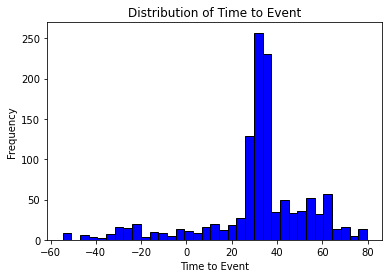

In [285]:
import matplotlib.pyplot as plt
#bin_count = int(np.ceil(np.log2(len(full_df))) + 1)
bin_count = int(np.sqrt(len(full_df)))
print(bin_count)
plt.hist(full_df.timetoevent,edgecolor='k',color='blue', bins=bin_count)
plt.title("Distribution of Time to Event")
plt.xlabel('Time to Event')
plt.ylabel('Frequency')
plt.show()


C:\Users\dave_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

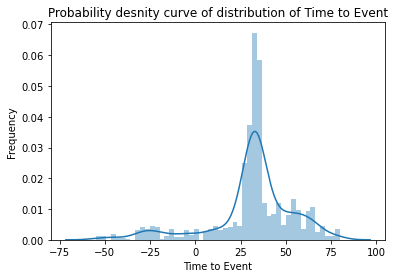

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.distplot(full_df.timetoevent, hist=True) # This is the relevant function.  hist=True part overlays density on top of a histogram
# Could also change bins=# as a parameter in this function 

plt.title('Probability desnity curve of distribution of Time to Event')
plt.xlabel('Time to Event')
plt.ylabel('Frequency')


C:\Users\dave_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Time to Event'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Time to Event')]

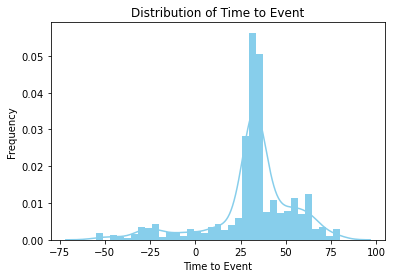

In [287]:
bin_count = int(np.sqrt(len(full_df)))
ax = sns.distplot(full_df.timetoevent,
                  bins=bin_count,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Time to Event', ylabel='Frequency', title='Distribution of Time to Event')

Text(0, 0.5, 'Bone Spacing (mm)')

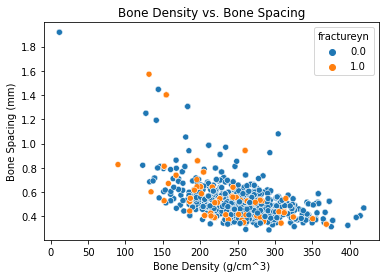

In [288]:
ax = sns.scatterplot(x='bonedensity', y='bonespacing', hue='fractureyn', data=full_df)
ax.set_title('Bone Density vs. Bone Spacing')
plt.xlabel('Bone Density (g/cm^3)')
plt.ylabel('Bone Spacing (mm)')

In [289]:

ax = sns.barplot(x="fractureyn", ,  data=full_df)


SyntaxError: invalid syntax (<ipython-input-289-77970f9a1713>, line 1)